Correlation Coefficient of the observed values: 0.0183
p-value: 0.0350


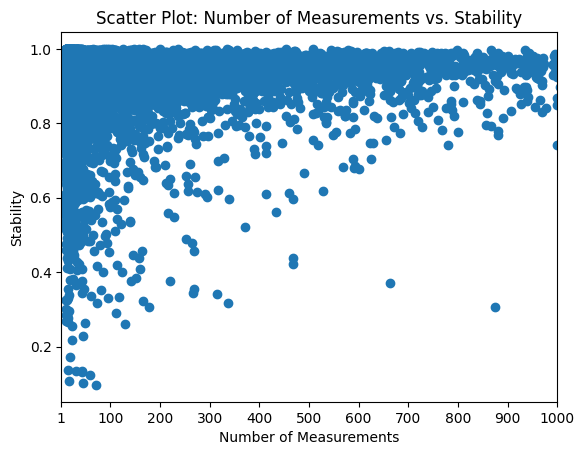

In [2]:
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
import sys
sys.path.append('../src')
import json
from src.mainController import MainController

# Load the JSON data from a file
with open('../data/output_rbf_40_60.json') as f:
    json_data = json.load(f)
mainController = MainController(json_data)
gdf = mainController.dto.gdf
# differ between observed and predicted values
filtered_observed = gdf[gdf['all_measurements']!=0]
filtered_predicted = gdf[gdf['all_measurements']==0]
many_measures_dps = gdf[gdf['all_measurements']>=40000]

# Step 1a: Correlation Analysis of observed datapoints
correlation_coefficient, p_value = pearsonr(filtered_observed['all_measurements'], filtered_observed['all_stability'])
print(f'Correlation Coefficient of the observed values: {correlation_coefficient:.4f}')
print(f'p-value: {p_value:.4f}')

# Step 2: Scatter Plot of observed datapoints
plt.scatter(filtered_observed['all_measurements'], filtered_observed['all_stability'])
plt.xlabel('Number of Measurements')
plt.ylabel('Stability')
plt.title('Scatter Plot: Number of Measurements vs. Stability')
plt.xlim(1, 1000)  # Set x-axis limits
plt.xticks([1] + list(range(100, 1001, 100)))
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Step 3: Simple Linear Regression
X = filtered_observed[['all_measurements']]
y = filtered_observed['all_stability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print the coefficients
print(f'Intercept: {model.intercept_:.4f}')
print(f'Coefficient (slope): {model.coef_[0]:.4f}')

Intercept: 0.9225
Coefficient (slope): 0.0000


In [4]:
import statsmodels.api as sm

# Add a constant term to the independent variable (Number_of_Measurements)
X = sm.add_constant(filtered_observed['all_measurements'])

# Dependent variable
y = filtered_observed['all_stability']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Display the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          all_stability   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.444
Date:                Sat, 27 Jan 2024   Prob (F-statistic):             0.0350
Time:                        16:22:22   Log-Likelihood:                 13689.
No. Observations:               13332   AIC:                        -2.737e+04
Df Residuals:                   13330   BIC:                        -2.736e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.9230      0.001  

In [5]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(filtered_observed['all_measurements'], filtered_observed['all_stability'])
print("Slope:", slope)
print("Intercept:", intercept)
print("R-value (Correlation Coefficient):", r_value)
print("P-value:", p_value)
print("Standard Error:", std_err)

# Here, the slope indicates that for every additional unit increase in 'all_measurements', 'all_stability' increases by approximately (slope value) units.
# Intercept suggests that when 'all_measurements' is zero, 'all_stability' is approximately 0.923 (intercept value). -> not true cause no measurement means stability is zero or not measured, respectively
# The standard error represents the standard deviation of the estimate of the slope coefficient

Slope: 1.1214262455823777e-06
Intercept: 0.9229814302480128
R-value (Correlation Coefficient): 0.018255748583804025
P-value: 0.03504267984023265
Standard Error: 5.319656793907119e-07
